# Gun Violence Incidents in USA - Exploration

Gun violence in the US results in tens of thousands of deaths and injuries annually. In 2013, there were 33,636 gun violence incidents which included 21,175 suicides, 11,674 homicides, 505 deaths due to accidental or negligent discharge of a firearm, and 281 deaths due to firearms use with "undetermined intent". 

In this notebook we will do the following:
1. Dataset Preparation
<br>
2. Exploring the Time Related Trends\
    2.1 Number of Incidents per Year\
    2.2 Average Number of Incidents per Month\
    2.3 Time Series of Incidents, People Killed and Injured
<br>  
3. Exploring the Location Related Trends
    3.1 Total Number of Incidents by Place\
    3.2 Total People Killed&Injured by Place\
    3.3 Common Areas of Gun Violence Incidents
<br> 
4. Exploring the Population Related Trends
    4.1 Population Adjusted - Incidents per 100K by Ethnic Group\
    4.2 Population Adjusted - Incidents by Age Group\
    4.3 Population Adjusted - Gender of victims\
<br>    
5. Other characteristics of Gun Violence Incidents\
    5.1 Police involvement in the Incidents\
    5.2 Most Serious Gun Violence Incidents\
    5.3 Key Characteristics of Gun Violence Incidents\
    5.4 Prominent Age of Suspects\
    5.5 Prominent Age of Victims\
<br>    

For background ref: 
- https://fivethirtyeight.com/features/gun-deaths/
- https://www.kaggle.com/code/shivamb/deep-exploration-of-gun-violence-in-us

Please see README.md for info on datasets and data dictionary

In [2]:
# Import data processing libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

We'll need to first read in the data and clean it for analysis.

![separator1](https://i.imgur.com/ZUWYTii.png)

In [4]:
# Reading in the guns dataset
guns_df = pd.read_csv('guns.csv', index_col='Unnamed: 0')
guns_df.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [7]:
# How many records are in this dataset?

guns_df.shape

(100798, 10)

In [8]:
# Let's look at some descriptive stats.

guns_df.describe()
# There's only data from 2012 to 2014
# There is a 0 year old victim and 107-year old victim in this dataset
# There's an extra column indicating the hispanic origin of the victim. 
## Does that mean that there is a higher proportion of hispanic gun violence victims in the US compared to other ethnic groups?

# It looks like we'll need to combine the year and month to create a time-series analysis

,year,month,police,age,hispanic,education
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


In [9]:
guns_df.info()

# The intent column seems to have 1 null value
# The age column seems to have quite a few null values
# Place and education columns also have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100798 entries, 1 to 100798
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   hispanic   100798 non-null  int64  
 8   place      99414 non-null   object 
 9   education  100745 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 8.5+ MB


### Fixing the dates

It looks like we need to join the year and month column and parse them

In [19]:
guns_df.head()
# pd.to_datetime(guns_df[['year', 'month']]) # doesn't work because you need year, month, day 

# Here we join the two columns together as string format first
year_month_col = guns_df['year'].astype(str) + '-' + guns_df['month'].astype(str)
guns_df.insert(loc=2, column='year_month', value=year_month_col)

# Need to double check if the year-month format will result in clean, easy time-series analyses

In [26]:
# Parsing the dates into datetime format

guns_df['year_month']
guns_df['year_month'] = pd.to_datetime(arg=guns_df['year_month'], format='%Y/%m').dt.to_period('M')



In [27]:
# Checking the dtypes

guns_df.info()

# Looks like we got a period[M] dtype instead of datetime. Might be a problem later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100798 entries, 1 to 100798
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype    
---  ------      --------------   -----    
 0   year        100798 non-null  int64    
 1   month       100798 non-null  int64    
 2   year_month  100798 non-null  period[M]
 3   intent      100797 non-null  object   
 4   police      100798 non-null  int64    
 5   sex         100798 non-null  object   
 6   age         100780 non-null  float64  
 7   race        100798 non-null  object   
 8   hispanic    100798 non-null  int64    
 9   place       99414 non-null   object   
 10  education   100745 non-null  float64  
dtypes: float64(2), int64(4), object(4), period[M](1)
memory usage: 9.2+ MB


In [28]:
guns_df.head()

,year,month,year_month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,2012-01,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,2012-01,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,2012-01,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,2012-02,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,2012-02,Suicide,0,M,31.0,White,100,Other specified,2.0


## Exploring the Time Related Trends

Let's take a look at how gun violence incidents have changed over time.

![separator1](https://i.imgur.com/ZUWYTii.png)

### Number of Incidents per Year

<AxesSubplot:ylabel='Frequency'>

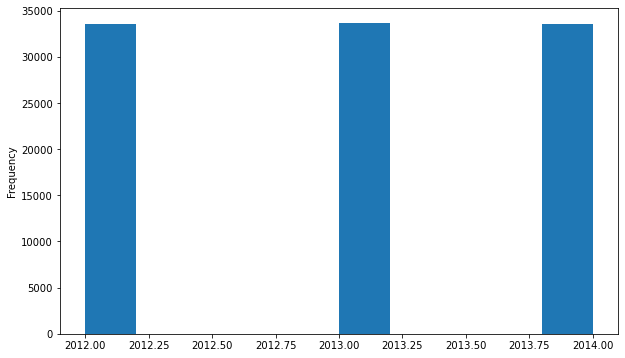

In [35]:
# To understand the number of incidents per year, we should plot it
# Let's try a frequency diagram

guns_df['year'].plot(kind='hist', figsize=(10,6))

# The frequency graph doesn't seem to be working properly
# There's an issue with the bins. And all of the bars are the same height. hmm..

In [36]:
# Test to see the number of records per year

guns_df['year'].value_counts()

# It looks like each year has the same number of incidents. 
# Looks a bit odd. But maybe if we dig deeper, the nature of each incident
# could be different

2013    33636
2014    33599
2012    33563
Name: year, dtype: int64

<AxesSubplot:>

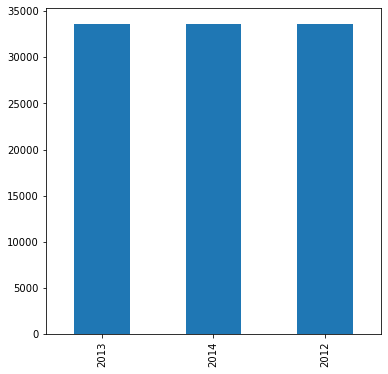

In [37]:
guns_df['year'].value_counts().plot(kind='bar', figsize=(6,6))


In [6]:
# Reading in the census dataset
census_df = pd.read_csv('census.csv', index_col='Id')
census_df.head()

,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
Id,,,,,,,,,,,,,,,,
cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195
